#**Ensemble Methods**

Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

## **Types of Ensemble Methods**
The three main classes of ensemble learning methods are bagging, stacking, and boosting, and it is important to both have a detailed understanding of each method and to consider them on your predictive modeling project.



1.   **Bagging** involves fitting many decision trees on different samples of the same dataset and averaging the predictions.
2.   **Voting** ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.
3.   **Boosting** involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.







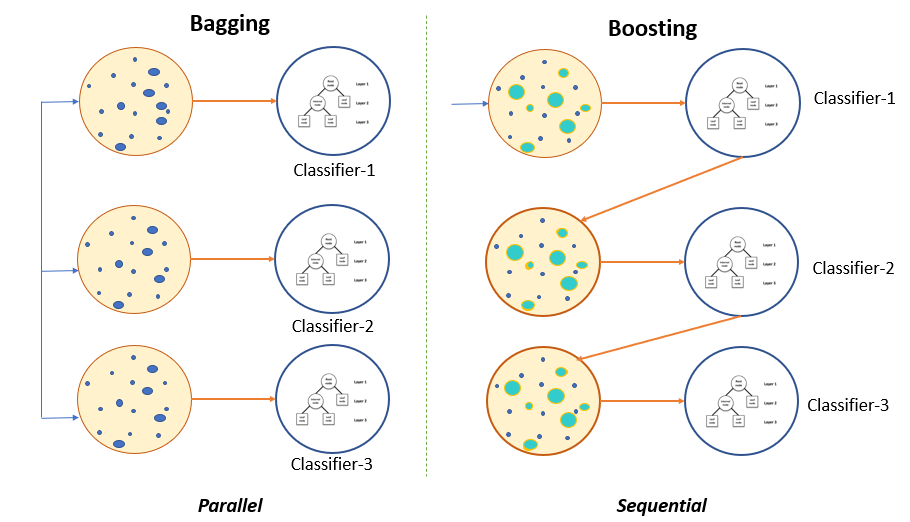

In [ ]:
# Necessary Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

# **Iris DataSet**

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.

In the Below loaded data, we have 4 features namely sepal length (cm),	sepal width (cm),	petal length (cm),	petal width (cm) respectively.

While for the Species column 0 refers to Iris setosa, 1 refers to Iris versicolor and 2 refers to Iris virginica

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
# Creating DataFrame

iris = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
# Adding target value to the data

iris['species'] = data.target

In [ ]:
iris.head() # Seeing the First 5 rows of the Dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## **Visualising the Iris Dataset**

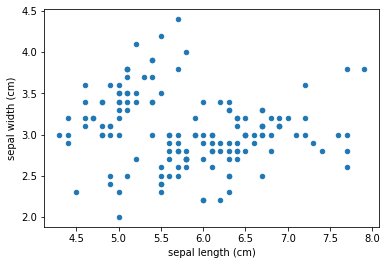

In [ ]:
iris.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

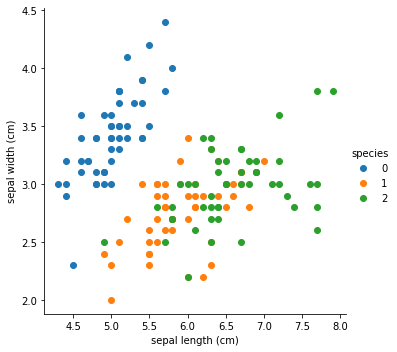

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

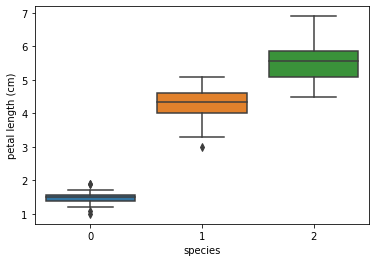

In [ ]:
sns.boxplot(x="species", y="petal length (cm)", data=iris)

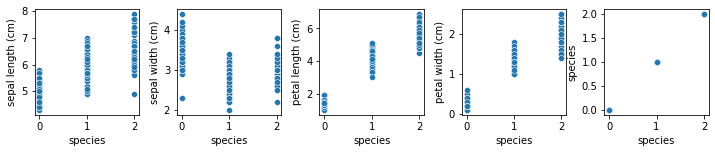

In [ ]:
plt.figure(figsize = (14, 10))
plotnumber = 1

for column in iris:
    if plotnumber <= 5:
        ax = plt.subplot(5, 7, plotnumber)
        sns.scatterplot(x = iris['species'], y = iris[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# Creating features and label variable

X = iris.drop('species', axis=1)
y = iris['species']

In [ ]:
# Splitting data into Training and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Using StandardScaler to help scaling the data so as to reduce effect of outliers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Random Forest**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

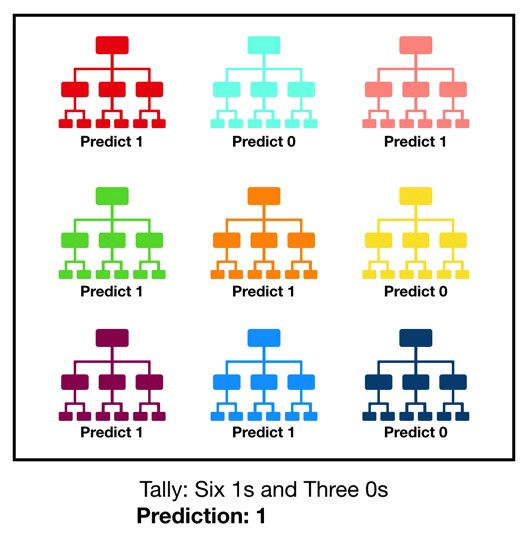



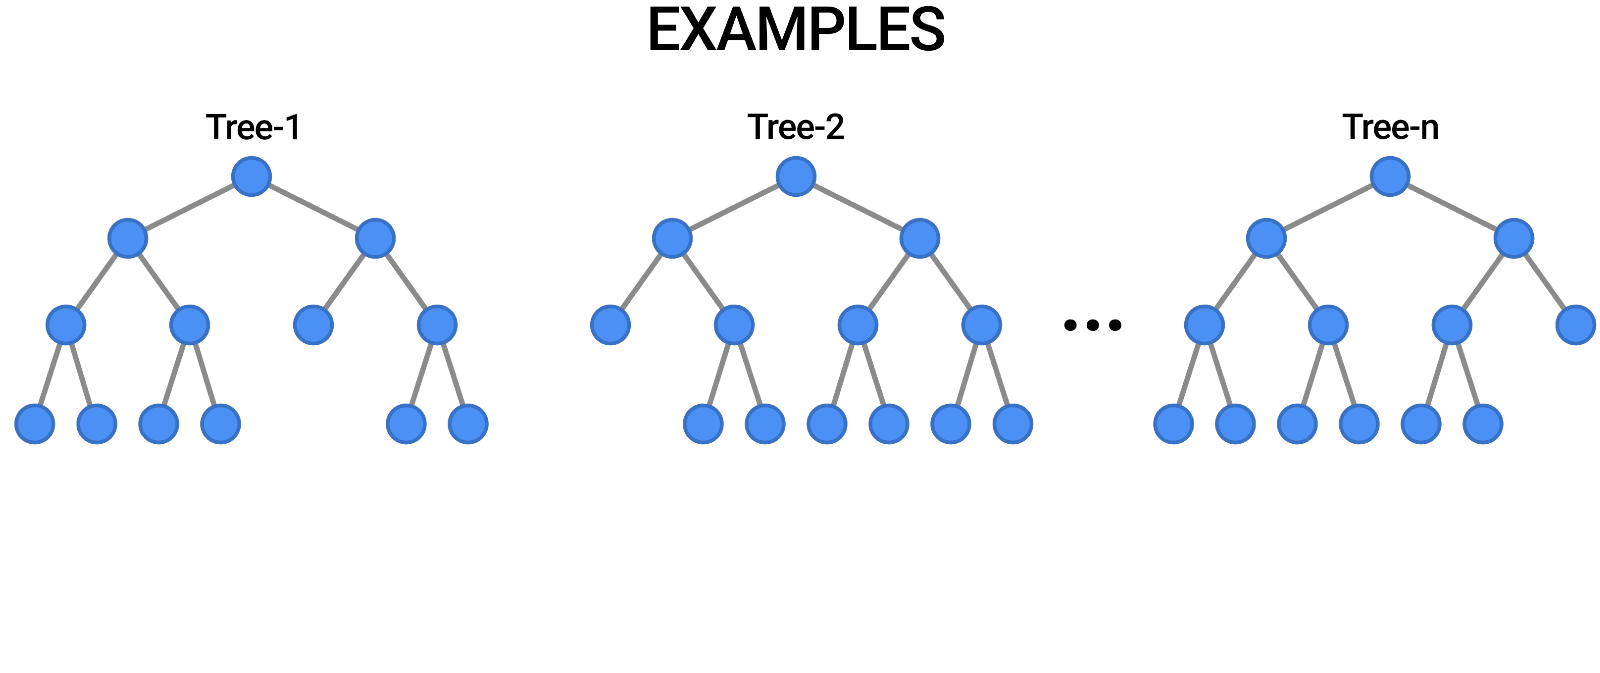

In [ ]:
# Using Random Forest classifier to Train and Fit the Data

from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [ ]:
# Predicting the Test Set Results

y_pred = forest_classifier.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)

In [ ]:
print("For Random Forest Classifation !!!!!")

print('The Confusion Matrix is : ')
print(cm)
print('The Accuracy Score is : ', acc)

For Random Forest Classifation !!!!!
The Confusion Matrix is : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The Accuracy Score is :  1.0


#**Adaboost**

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier that  builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

1. The classifier should be trained interactively on various weighed training examples.
2. In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

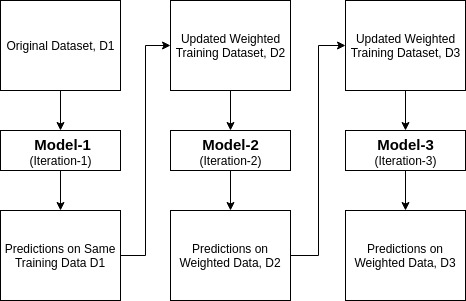

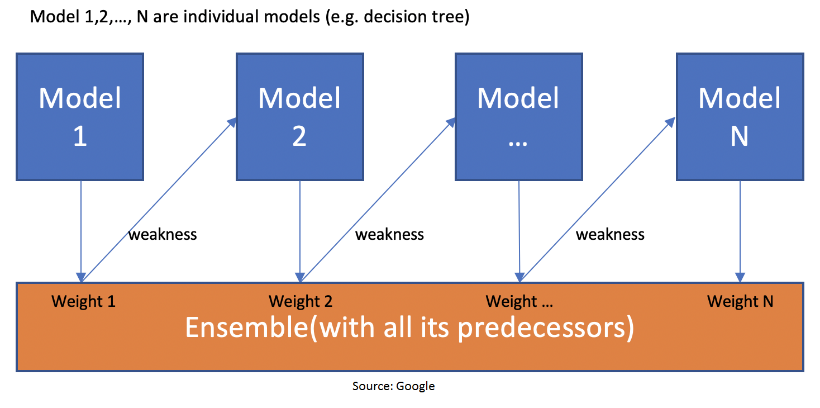

In [ ]:
# Using AdaBoost classifier to Train and Fit the Data

from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
# Predicting the Test Set Results

y_pred = ada_classifier.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)

In [ ]:
print("For Adaboost Classifation !!!!!")

print('The Confusion Matrix is : ')
print(cm)
print('The Accuracy Score is : ', acc)

For Adaboost Classifation !!!!!
The Confusion Matrix is : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The Accuracy Score is :  1.0


# **Gradient Boosting**

 Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

 **Gradient Boosting** trains many models in a gradual, additive and sequential manner.

The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.






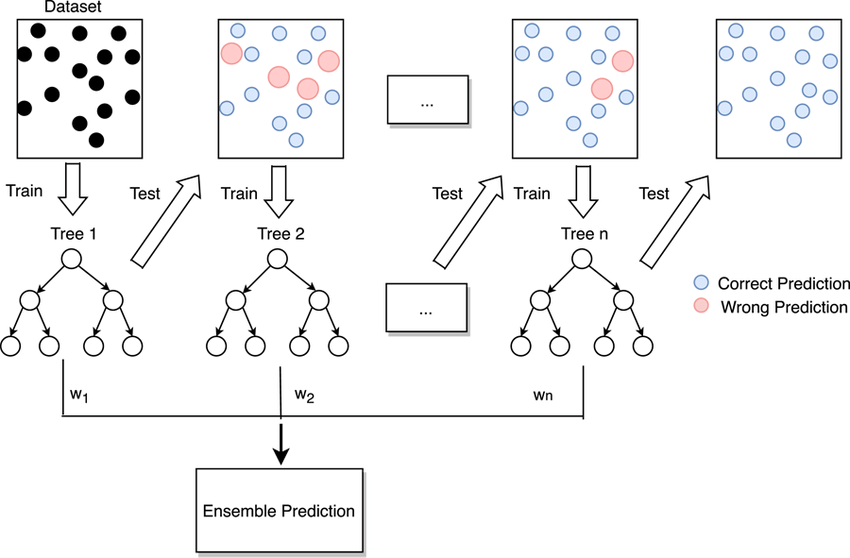

In [ ]:
# Using Gradient Boosting classifier to Train and Fit the Data

from sklearn.ensemble import GradientBoostingClassifier

gradient_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [ ]:
# Predicting the Test Set Results

y_pred_grad = gradient_classifier.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred_grad})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)

In [ ]:
print("For Gradient Boosting Classifation !!!!!")

print('The Confusion Matrix is : ')
print(cm)
print('The Accuracy Score is : ', acc)

For Gradient Boosting Classifation !!!!!
The Confusion Matrix is : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The Accuracy Score is :  1.0


#**Voting Classifier** 

**Voting classifier** is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

Voting Classifier supports two types of votings.

1. **Hard** **Voting**: **In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
2. **Soft** **Voting**: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.
Note: Make sure to include a variety of models to feed a Voting Classifier to be sure that the error made by one might be resolved by the other.

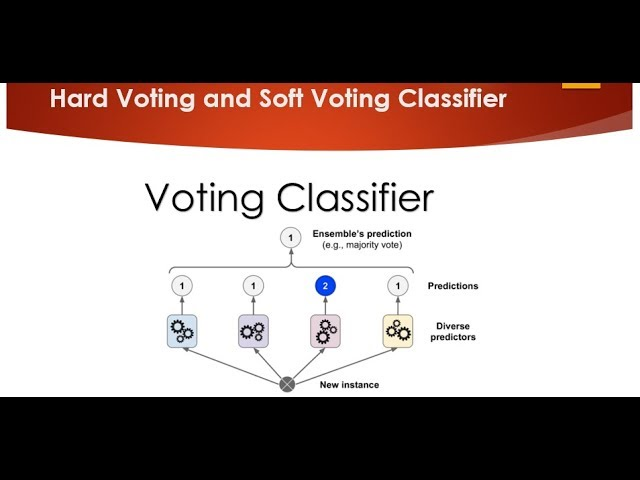

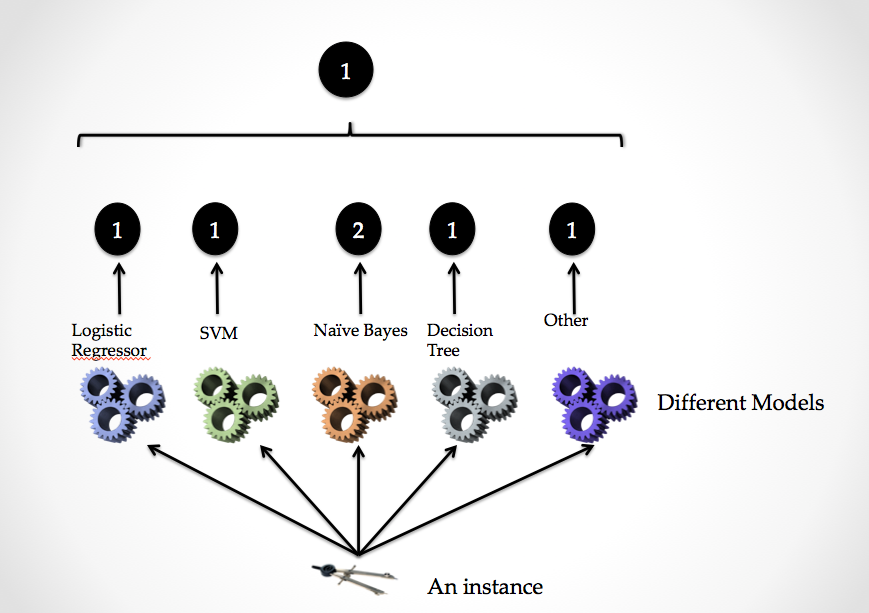

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
# Voting Classifier with hard voting
vot_classifier = VotingClassifier(estimators = estimator, voting ='hard')
vot_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DTC', DecisionTreeClassifier())])

In [ ]:
# Predicting the Test Set Results

y_pred_vot = vot_classifier.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values (Voting)": y_pred_vot})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values (Voting)
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_vot)
acc= accuracy_score(y_test, y_pred_vot)

In [ ]:
print("For Voting Classifation !!!!!")

print('The Confusion Matrix is : ')
print(cm)
print('The Accuracy Score is : ', acc)

For Voting Classifation !!!!!
The Confusion Matrix is : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The Accuracy Score is :  1.0
